In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean

In [2]:
def read_accuracy_file(synthesis_results_file):
    lines = []
    with open(synthesis_results_file) as screen_outputs:
        lines = screen_outputs.readlines()

    # Obtain resources
    resources = dict.fromkeys(
        ['LUTs', 'FFs', 'DSPs', 'BRAMs', 'Frequency', 'Cycles'])
    resources['FFs'] = 0  # incase no registers
    for line in lines:
        if line[:6] == "  Luts":
            resources['LUTs'] = (int(line[29:-1]))
        elif line[:11] == "  Registers":
            resources['FFs'] = (int(line[29:-1]))
        elif line[:6] == "  DSPs":
            resources['DSPs'] = (int(line[29:-1]))
        elif line[:7] == "  BRAMs":
            resources['BRAMs'] = (int(line[29:-1]))
        elif line[:11] == "  Frequency":
            resources['Frequency'] = (float(line[29:-1]))
        elif line[:14] == "  Total cycles":
            resources['Cycles'] = (int(line[29:-7]))

    return resources

In [3]:
# https://stackoverflow.com/questions/22104256/does-matplotlib-have-a-function-for-drawing-diagonal-lines-in-axis-coordinates
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)

    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [4]:
def plot_results(benchmark_name, benchmark_size, all=False):
    fig, axs = plt.subplots(nrows=2,
                            ncols=2+all,
                            figsize=(10, 6))

    # colors = ['#a6cee3', '#1f78b4', '#fdbf6f', '#ff7f00', '#b2df8a', '#33a02c']
    colors = (mpl.colormaps['tab10']).colors

    # formats = ['float32', 'posit32',
    #            'float64', 'posit64']
    formats = ['float32', 'float64',
               'posit32', 'posit64',
               'posit_float32', 'posit_float64']

    for i, format in enumerate(formats):
        luts_list = []
        ffs_list = []
        dsps_list = []
        brams_list = []
        frequency_list = []
        cycles_list = []
        target_list = []

        # for period in [20, 10, 6.66667, 5, 4, 3.3333]:
        for period in [20, 10, 6.66667]:
            df = read_accuracy_file(
                '../Bambu/' + benchmark_name + '/' + format + '/results_' + str(period) + '_' + benchmark_size + '.txt')

            luts_list.append(df['LUTs'])
            ffs_list.append(df['FFs'])
            dsps_list.append(df['DSPs'])
            brams_list.append(df['BRAMs'])
            frequency_list.append(df['Frequency'])
            cycles_list.append(df['Cycles'])
            target_list.append(round(1000/period))

        # plot
        axs[0, 0].plot(target_list, luts_list, label=format, color=colors[i])
        axs[0, 1].plot(target_list, ffs_list, label=format, color=colors[i])
        axs[1, 0].plot(target_list, frequency_list,
                       label=format, color=colors[i])
        axs[1, 1].plot(target_list, cycles_list, label=format, color=colors[i])
        if (all):
            axs[0, 2].plot(target_list, dsps_list,
                           label=format, color=colors[i])
            axs[1, 2].plot(target_list, brams_list,
                           label=format, color=colors[i])

    # Labels
    axs[0, 0].set_ylabel('LUTs')
    axs[0, 1].set_ylabel('FFs')
    axs[1, 0].set_ylabel('Max Frequency (MHz)')
    axs[1, 1].set_ylabel('Latency (cycles)')
    axs[1, 0].set_xlabel('Target Frequency (MHz)')
    axs[1, 1].set_xlabel('Target Frequency (MHz)')
    if (all):
        axs[0, 2].set_ylabel('DSPs')
        axs[1, 2].set_ylabel('BRAMs')
        axs[1, 2].set_xlabel('Target Frequency (MHz)')

    # Grid
    axs[0, 0].grid(zorder=0, )  # axis='y')
    axs[0, 1].grid(zorder=0, )  # axis='y')
    axs[1, 0].grid(zorder=0, )  # axis='y')
    axs[1, 1].grid(zorder=0, )  # axis='y')
    if (all):
        axs[0, 2].grid(zorder=0, )  # axis='y')
        axs[1, 2].grid(zorder=0, )  # axis='y')
    for ax in np.ravel(axs):
        ax.set_xticks(target_list)

    # Show target frequencies
    add_identity(axs[1, 0],
                 color='tab:gray',
                 linestyle='--',
                 linewidth=1,
                 zorder=0)

    # Adjust the spacing between the subplots
    fig.tight_layout()

    # Create a legend object for all subplots
    fig.legend(list(map(str.title, formats)), title='Format',
               loc='upper center', bbox_to_anchor=(0.5, 1.08),
               ncol=len(formats))

    # plt.savefig(benchmark_name+'_synthesis.pdf', bbox_inches='tight')

    plt.show()

## Results per benchmark

### GEMM

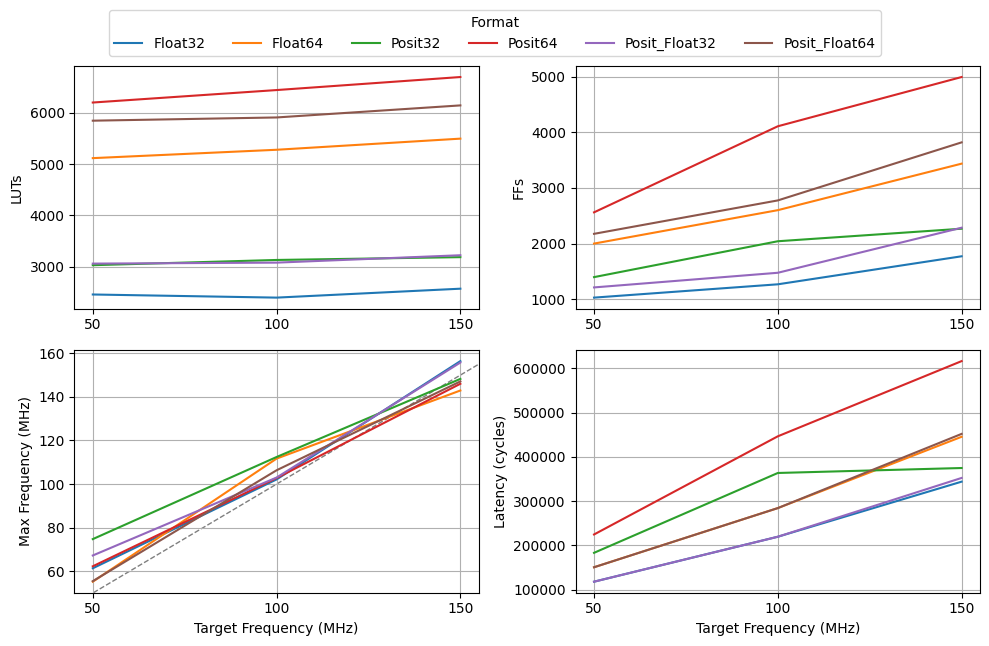

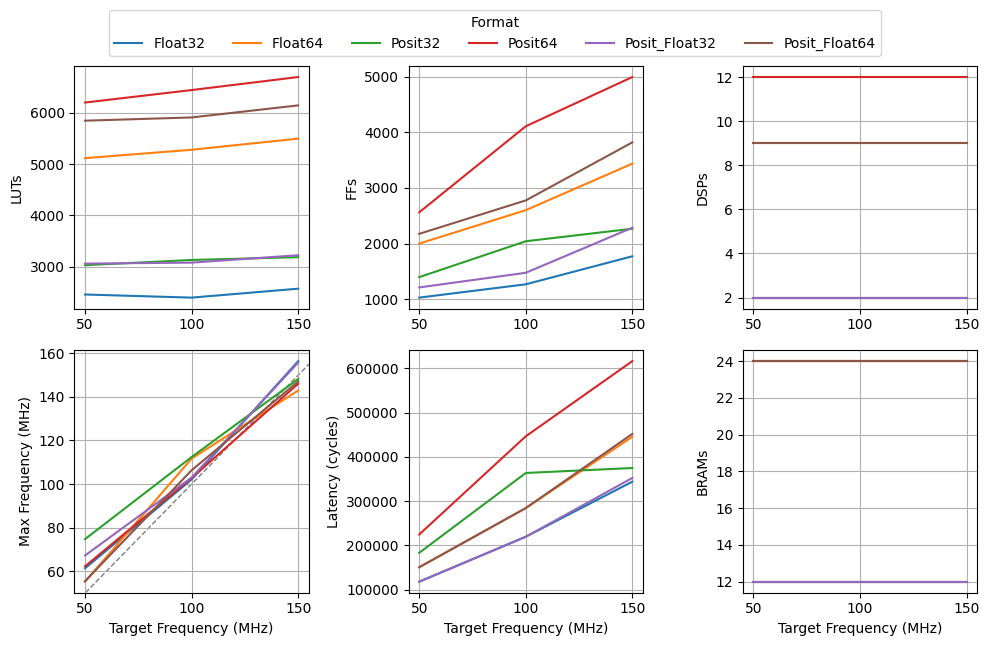

In [8]:
benchmark_name = 'polybench/gemm'
benchmark_size = 'MINI'

plot_results(benchmark_name, benchmark_size)
plot_results(benchmark_name, benchmark_size, all=True)

### 3mm

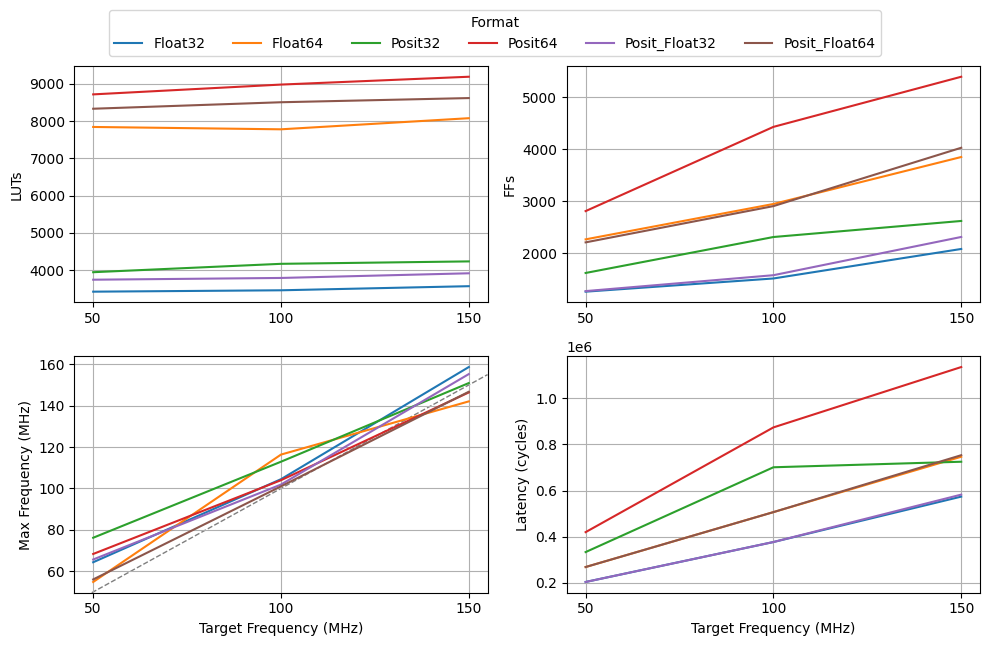

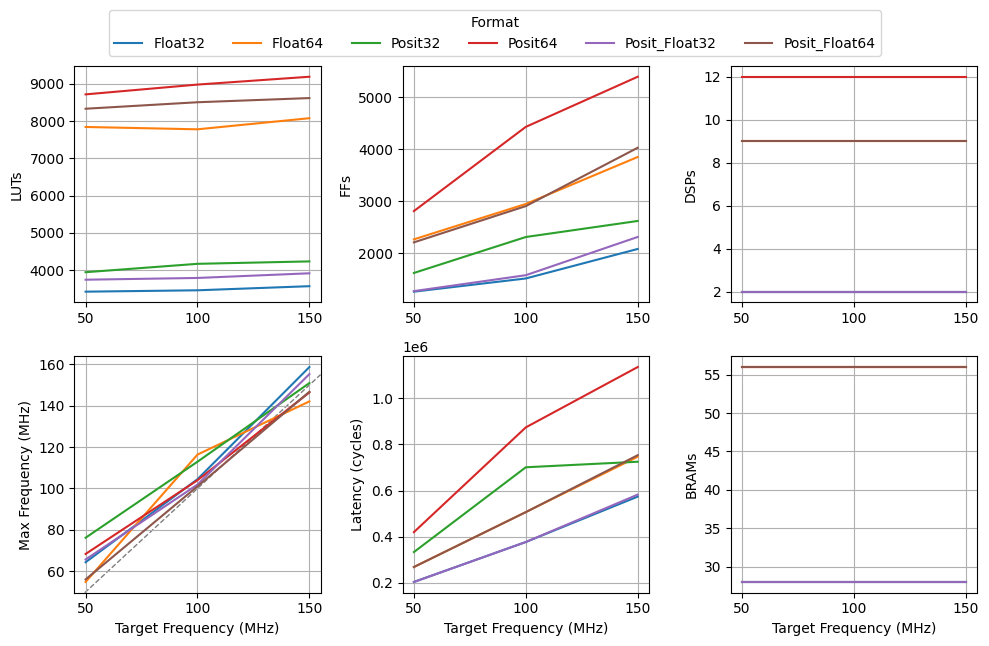

In [81]:
benchmark_name = 'polybench/3mm'
benchmark_size = 'MINI'

plot_results(benchmark_name, benchmark_size)
plot_results(benchmark_name, benchmark_size, all=True)

### Cholesky

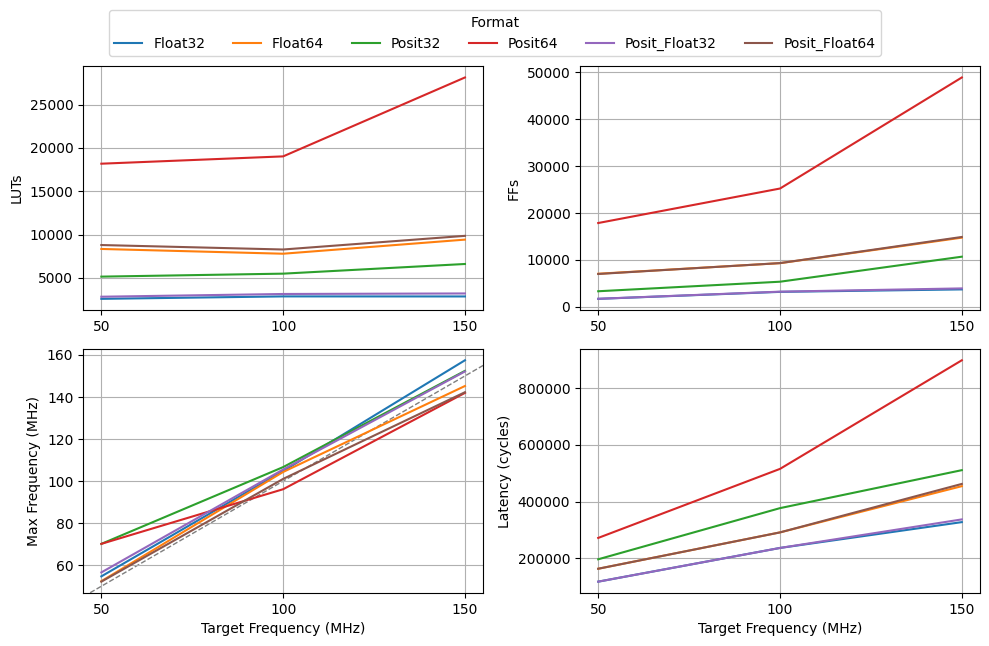

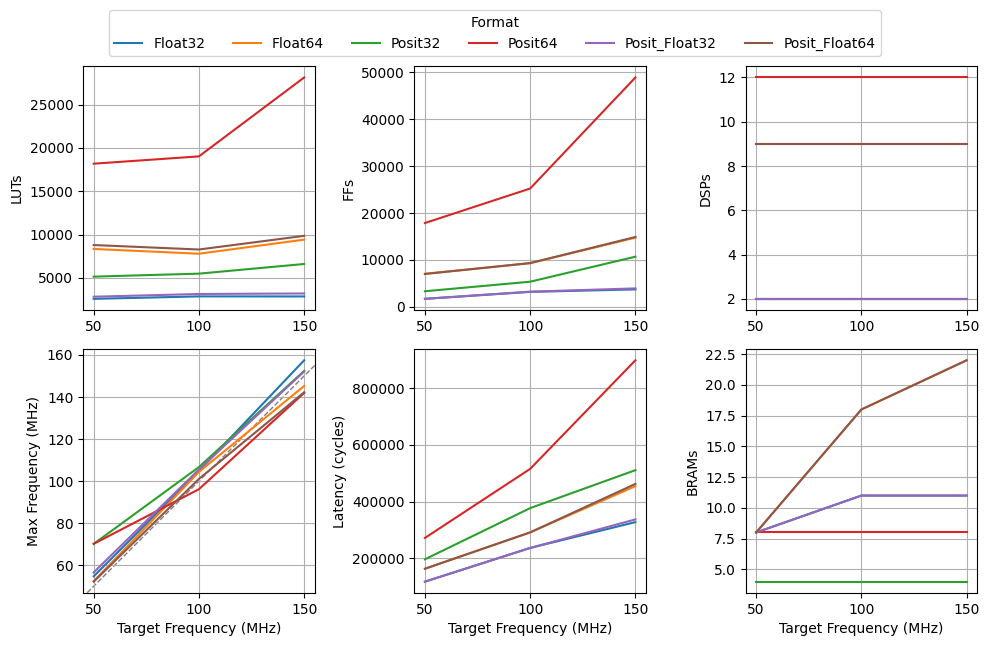

In [82]:
benchmark_name = 'polybench/cholesky'
benchmark_size = 'MINI'

plot_results(benchmark_name, benchmark_size)
plot_results(benchmark_name, benchmark_size, all=True)

### Covariance

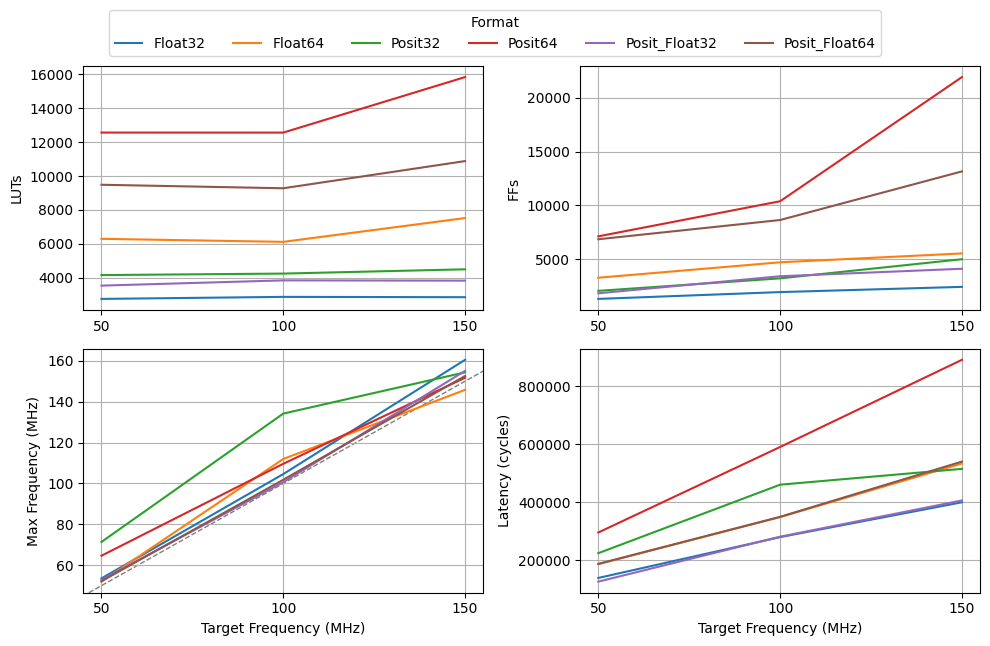

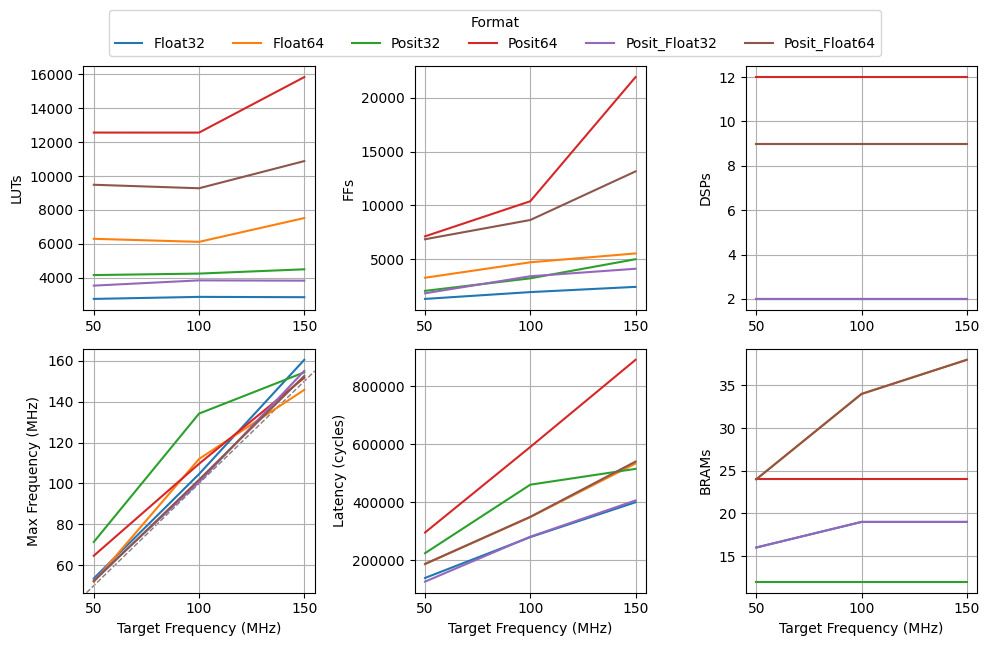

In [83]:
benchmark_name = 'polybench/covariance'
benchmark_size = 'MINI'

plot_results(benchmark_name, benchmark_size)
plot_results(benchmark_name, benchmark_size, all=True)

### Durbin

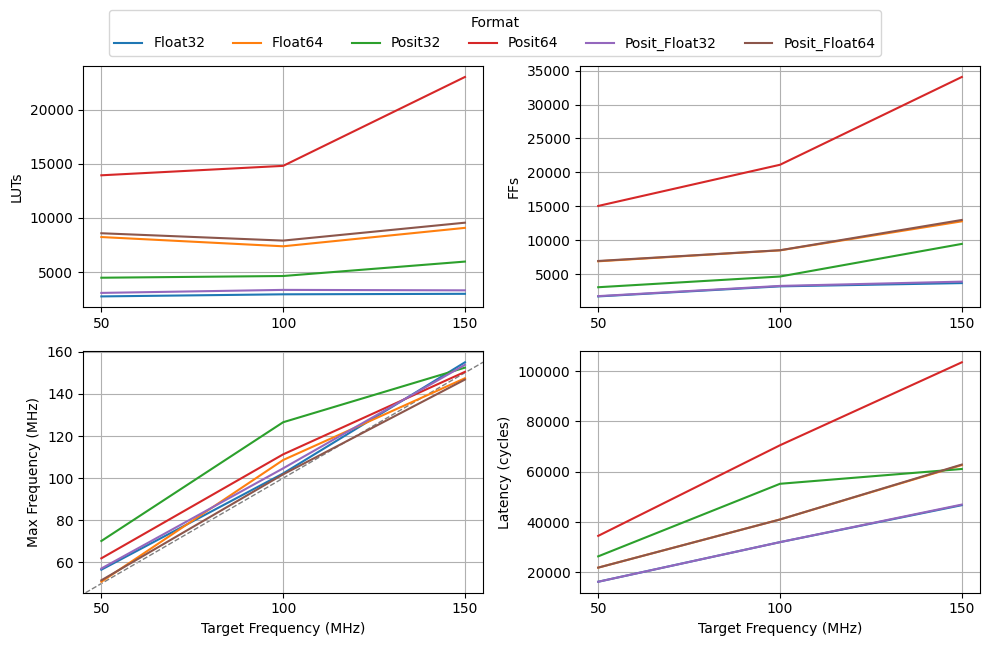

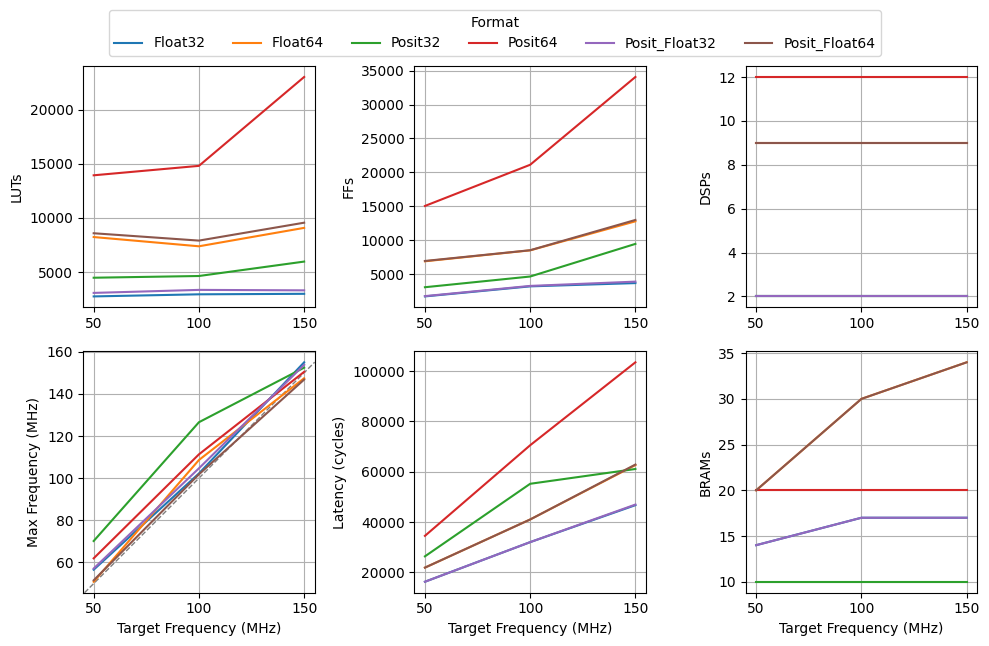

In [84]:
benchmark_name = 'polybench/durbin'
benchmark_size = 'MINI'

plot_results(benchmark_name, benchmark_size)
plot_results(benchmark_name, benchmark_size, all=True)

### Fdtd-2d

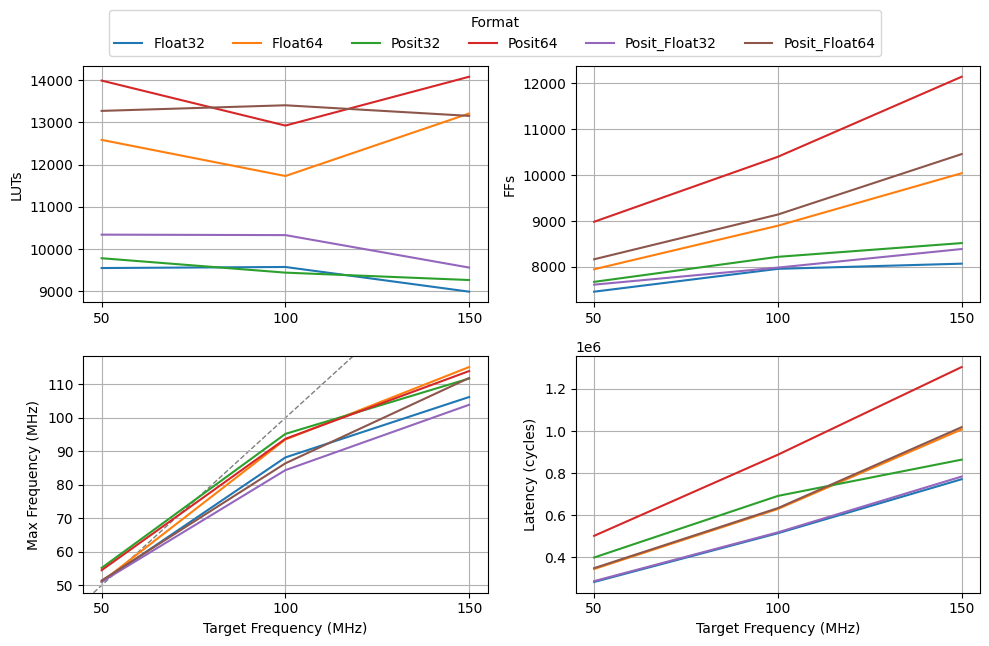

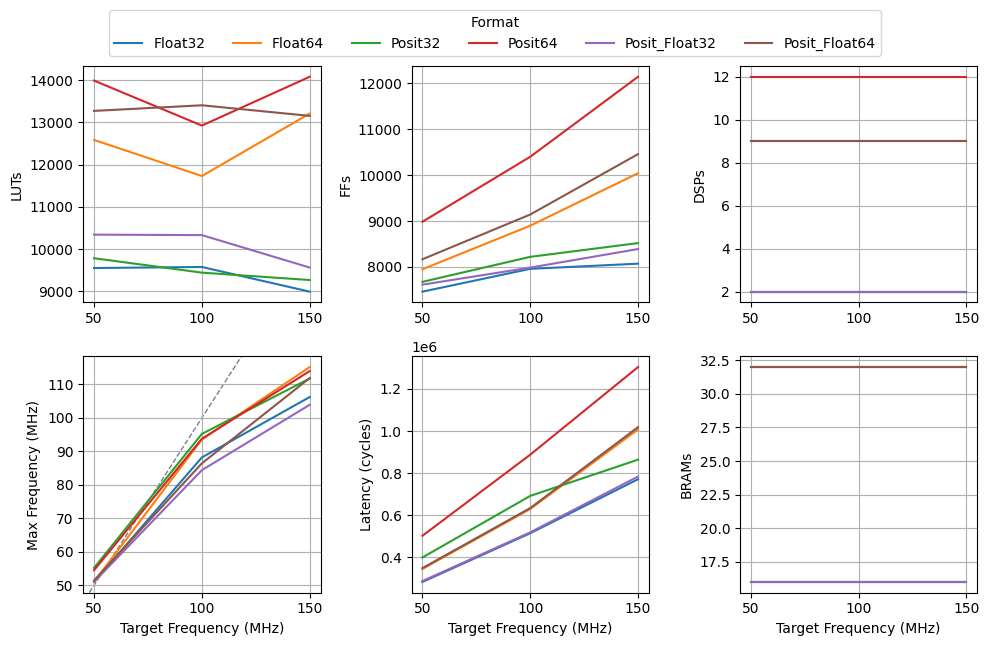

In [85]:
benchmark_name = 'polybench/fdtd-2d'
benchmark_size = 'MINI'

plot_results(benchmark_name, benchmark_size)
plot_results(benchmark_name, benchmark_size, all=True)

### LU dcmp

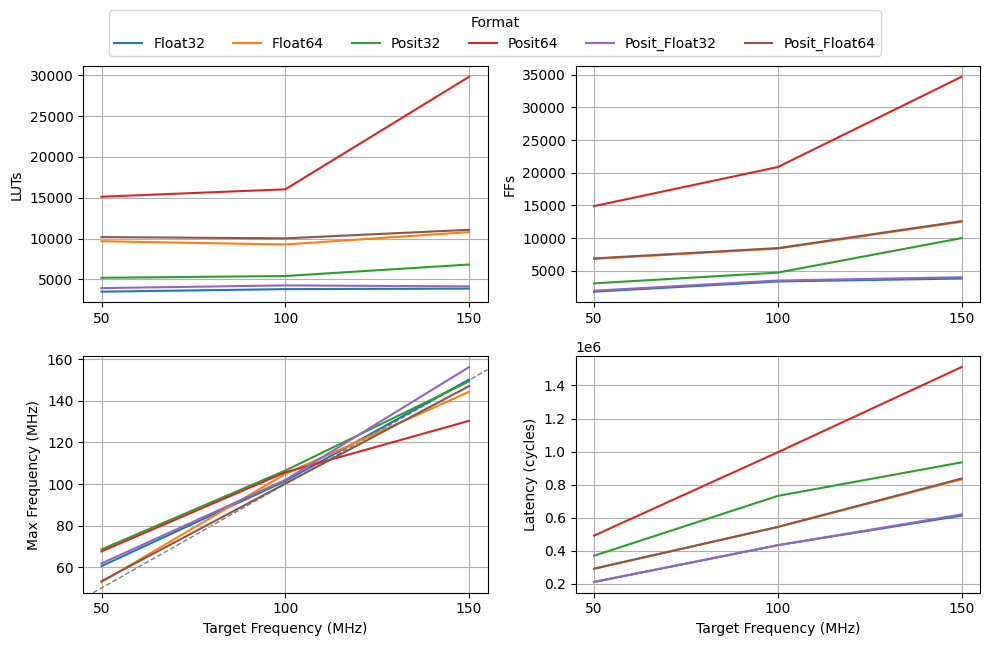

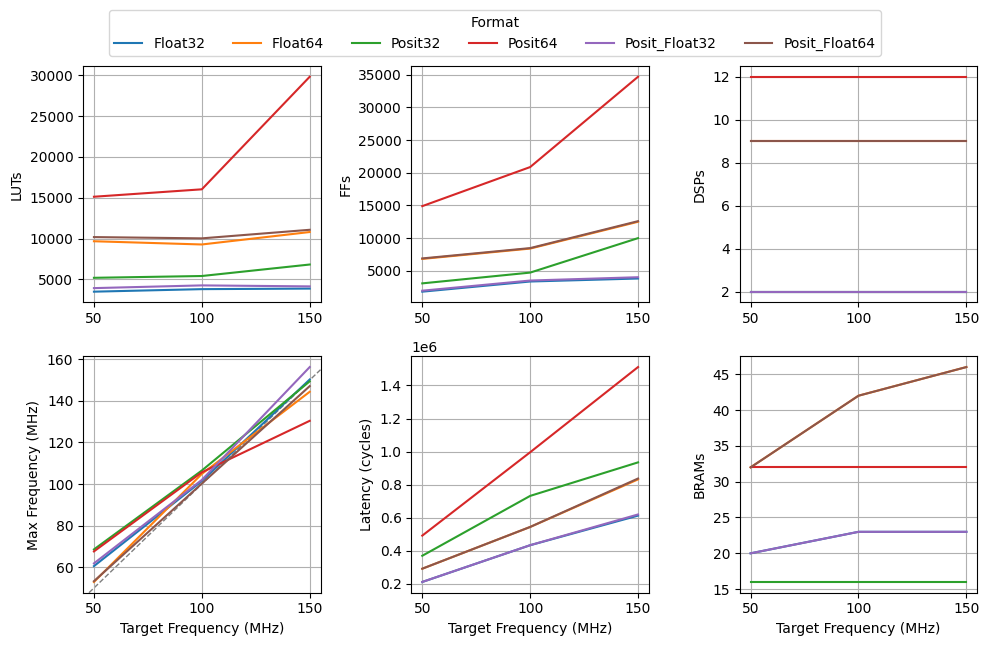

In [86]:
benchmark_name = 'polybench/ludcmp'
benchmark_size = 'MINI'

plot_results(benchmark_name, benchmark_size)
plot_results(benchmark_name, benchmark_size, all=True)

### Seidel-2d

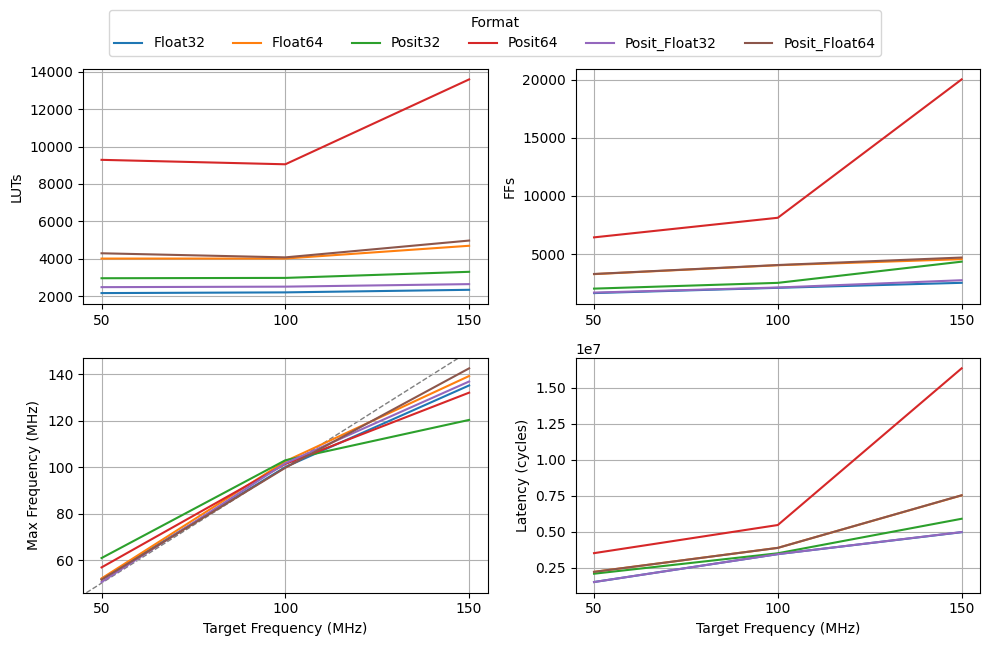

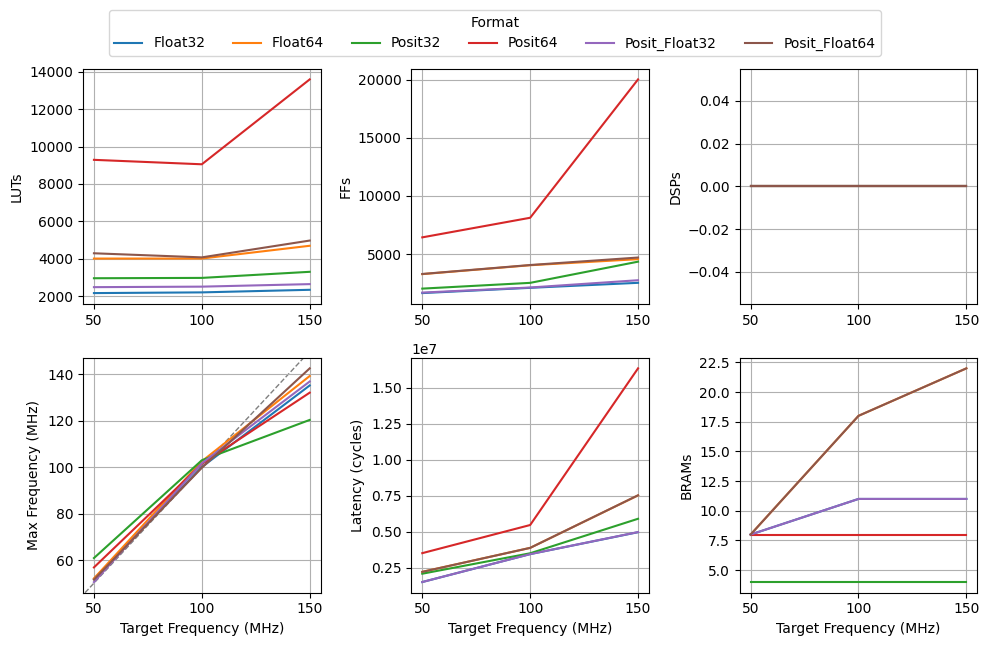

In [87]:
benchmark_name = 'polybench/seidel-2d'
benchmark_size = 'MINI'

plot_results(benchmark_name, benchmark_size)
plot_results(benchmark_name, benchmark_size, all=True)

## Tabular data

In [6]:
period = 6.66667
benchmark_size = 'MINI'

formats = ['float32', 'float64',
           'posit32', 'posit64',
           'posit_float32', 'posit_float64']

resources = []

# BENCHMARKS = ['3mm', 'cholesky', 'covariance', 'durbin', 'fdtd-2d', 'gemm', 'ludcmp', 'seidel-2d']
BENCHMARKS = ['3mm', 'cholesky', 'covariance', 'fdtd-2d', 'gemm', 'ludcmp']


for benchmark_name in BENCHMARKS:
    for format in (formats):
        benchmark_dict = read_accuracy_file(
            '../Bambu/polybench/' + benchmark_name + '/' + format + '/results_' + str(period) + '_' + benchmark_size + '.txt')

        benchmark_dict['Benchmark'] = (benchmark_name)
        benchmark_dict['Format'] = (format.title())
        resources.append(benchmark_dict)


df = pd.DataFrame(resources)

# Columns order
df = df[['Benchmark', 'Format', 'LUTs', 'FFs',
         'DSPs', 'BRAMs', 'Frequency', 'Cycles']]
df.rename(columns={'Frequency': 'Max Frequency (MHz)',
          'Cycles': 'Latency (cycles)'}, inplace=True)
df.replace(['Posit_Float32', 'Posit_Float64'], [
           'Posit32$_{mem}$Float32', 'Posit32$_{mem}$Float64'], inplace=True)
METRICS = ['LUTs', 'FFs', 'DSPs', 'BRAMs',
           'Max Frequency (MHz)', 'Latency (cycles)']
df

# print(df.to_latex())

,Benchmark,Format,LUTs,FFs,DSPs,BRAMs,Max Frequency (MHz),Latency (cycles)
0,3mm,Float32,3568,2079,2,28,158.654609,573628
1,3mm,Float64,8074,3849,9,56,142.065634,746426
2,3mm,Posit32,4233,2618,2,28,150.920616,724813
3,3mm,Posit64,9186,5394,12,56,146.391451,1135187
4,3mm,Posit32$_{mem}$Float32,3914,2310,2,28,155.255395,582299
5,3mm,Posit32$_{mem}$Float64,8614,4027,9,56,146.713615,753106
6,cholesky,Float32,2853,3701,2,11,157.455519,327975
7,cholesky,Float64,9413,14739,9,22,145.222190,454622
8,cholesky,Posit32,6600,10678,2,4,152.415790,510996
9,cholesky,Posit64,28129,48899,12,8,141.944642,897997


In [6]:
# Compare results

for i, metric in enumerate(METRICS):
    tmp = df[['Benchmark', 'Format', metric]].pivot(
        index='Benchmark', columns='Format', values=metric)

    print('\n', metric)
    print('32 bits:', tmp['Posit32']/tmp['Float32'])
    print('64 bits:', tmp['Posit64']/tmp['Float64'])
    # print('32 bits:', tmp['Posit32$_{mem}$Float32']/tmp['Float32'])
    # print('64 bits:', tmp['Posit32$_{mem}$Float64']/tmp['Float64'])


 LUTs
32 bits: Benchmark
3mm           1.186379
cholesky      2.313354
covariance    1.580077
fdtd-2d       1.030704
gemm          1.239300
ludcmp        1.764508
dtype: float64
64 bits: Benchmark
3mm           1.137726
cholesky      2.988314
covariance    2.107903
fdtd-2d       1.065935
gemm          1.218562
ludcmp        2.763502
dtype: float64

 FFs
32 bits: Benchmark
3mm           1.259259
cholesky      2.885166
covariance    2.062784
fdtd-2d       1.055645
gemm          1.279188
ludcmp        2.609705
dtype: float64
64 bits: Benchmark
3mm           1.401403
cholesky      3.317661
covariance    3.966010
fdtd-2d       1.209620
gemm          1.452561
ludcmp        2.772738
dtype: float64

 DSPs
32 bits: Benchmark
3mm           1.0
cholesky      1.0
covariance    1.0
fdtd-2d       1.0
gemm          1.0
ludcmp        1.0
dtype: float64
64 bits: Benchmark
3mm           1.333333
cholesky      1.333333
covariance    1.333333
fdtd-2d       1.333333
gemm          1.333333
ludcmp        1.

In [6]:
(df[['Benchmark', 'Format', 'LUTs']].pivot(index='Benchmark', columns='Format').apply(lambda x: x.astype(float))).prod().pow(1 / len(BENCHMARKS))

      Format                
LUTs  Float32                    3703.152609
      Float64                    8746.133915
      Posit32                    5414.827074
      Posit32$_{mem}$Float32     4272.355776
      Posit32$_{mem}$Float64     9685.634499
      Posit64                   15027.090838
dtype: float64

In [9]:
# from scipy.stats.mstats import gmean

# # gmean1 = lambda x: x.product() ** (1 / float(len(x)))


# # df[['Benchmark', 'Format', 'LUTs']].groupby('Format').transform(gmean)[:6]
# g_mean = df[['Benchmark', 'Format', 'LUTs']].groupby(
#     'Format').prod().pow(1 / len(BENCHMARKS))

# # for v in g_mean.values:
# #     print(v[0])
# g_mean.rename(columns={'LUTs': 'geometric\nmean'}, inplace=True)
# g_mean.T.values[0]

In [7]:
m_df = df[['Benchmark', 'Format', 'LUTs']].pivot(
    index='Benchmark', columns='Format', values='LUTs')

m_df

g_mean = gmean(m_df, axis=0)

# dtt = pd.concat([m_df, g_mean.T])
# print(dtt.keys)
# dtt.plot()
# m_df.keys
# # type(m_df)
# # m_df.mean(axis=0)
m_df.loc['geo_mean'] = g_mean.T
m_df

Format,Float32,Float64,Posit32,Posit32$_{mem}$Float32,Posit32$_{mem}$Float64,Posit64
Benchmark,,,,,,
3mm,3568.000000,8074.000000,4233.000000,3914.000000,8614.000000,9186.000000
cholesky,2853.000000,9413.000000,6600.000000,3199.000000,9848.000000,28129.000000
covariance,2841.000000,7516.000000,4489.000000,3818.000000,10881.000000,15843.000000
fdtd-2d,8989.000000,13210.000000,9265.000000,9560.000000,13154.000000,14081.000000
gemm,2570.000000,5495.000000,3185.000000,3222.000000,6143.000000,6696.000000
ludcmp,3860.000000,10795.000000,6811.000000,4130.000000,11069.000000,29832.000000
geo_mean,3703.152609,8746.133915,5414.827074,4272.355776,9685.634499,15027.090838


In [11]:
# Print all geometric means

for i, metric in enumerate(METRICS):
    # g_mean = df[['Benchmark', 'Format', metric]].groupby(
    #     'Format', sort=False).prod().pow(1 / len(BENCHMARKS))

    df_m = df[['Benchmark', 'Format', metric]].pivot(
    index='Benchmark', columns='Format', values=metric)    
    g_mean = gmean(df[['Benchmark', 'Format', metric]].pivot(
    index='Benchmark', columns='Format', values=metric), axis=0)

    df_m.loc['geo_mean'] = gmean(df_m, axis=0).T
    # df_m = df_m['geo_mean']
    print(df_m.iloc[[-1]])

Format         Float32      Float64      Posit32  Posit32$_{mem}$Float32  \
Benchmark                                                                  
geo_mean   3703.152609  8746.133915  5414.827074             4272.355776   

Format     Posit32$_{mem}$Float64       Posit64  
Benchmark                                        
geo_mean              9685.634499  15027.090838  
Format         Float32      Float64     Posit32  Posit32$_{mem}$Float32  \
Benchmark                                                                 
geo_mean   3173.505625  7165.386469  5476.50105             3769.960869   

Format     Posit32$_{mem}$Float64       Posit64  
Benchmark                                        
geo_mean              8572.497125  15163.976269  
Format     Float32  Float64  Posit32  Posit32$_{mem}$Float32  \
Benchmark                                                      
geo_mean       2.0      9.0      2.0                     2.0   

Format     Posit32$_{mem}$Float64  Posit64  
Benchma

In [8]:
# Print all geometric means

for i, metric in enumerate(METRICS):
    g_mean = df[['Benchmark', 'Format', metric]].groupby(
        'Format', sort=False).prod().pow(1 / len(BENCHMARKS))
    print(g_mean)

TypeError: agg function failed [how->prod,dtype->object]

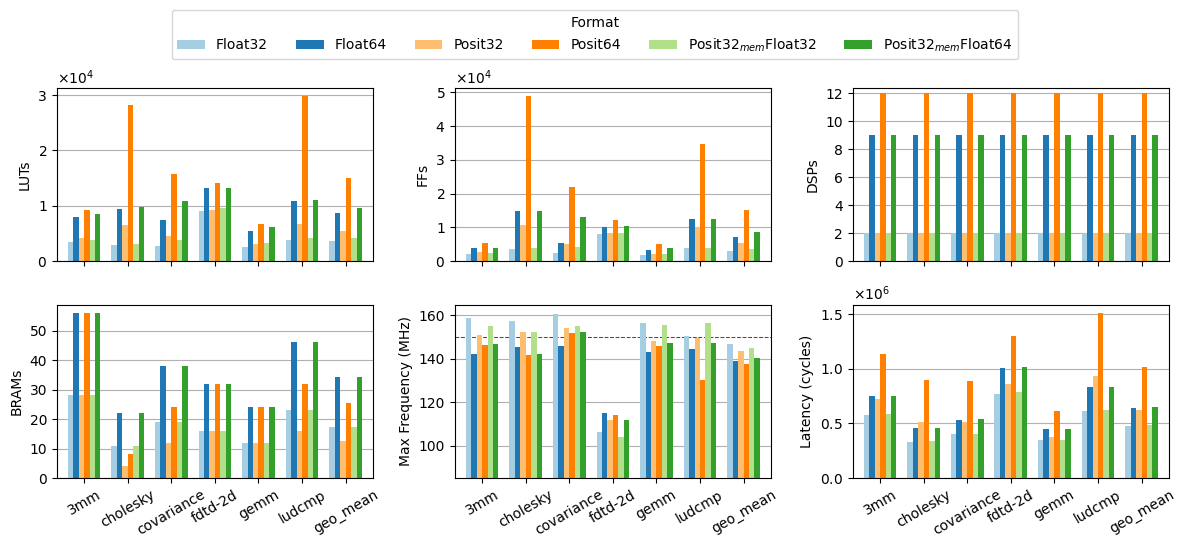

In [92]:
fig, axs = plt.subplots(2, 3, sharex=True,
                        figsize=(12, 5)
                        )
colors = ['#a6cee3', '#1f78b4', '#fdbf6f', '#ff7f00', '#b2df8a', '#33a02c',
          '#a6cee3', '#1f78b4', '#fdbf6f', '#ff7f00', '#b2df8a', '#33a02c']

for i, metric in enumerate(METRICS):
    log_y = metric in ['Cycles'] and False

    # GEOMETRIC MEAN
    # if metric != 'DSPs':
    # g_mean = (df.loc[df['Benchmark'] != 'seidel-2d'])[['Benchmark', 'Format', metric]].groupby('Format').prod().pow(1 / 7)
    # g_mean = df[['Benchmark', 'Format', metric]].groupby(
    #     'Format', sort=False).prod().pow(1 / len(BENCHMARKS))
    # g_mean = g_mean.rename(columns = {'LUTs':'geometric\nmean'})
    # # g_mean.plot(ax=axs[int(i/3),i%3],
    # #             kind='line')
    # for j, v in enumerate(g_mean.values):
    #     axs[int(i/3),i%3].hlines(v, xmin=-1, xmax=8,
    #                             color = colors[j],
    #                             linestyle=(j, (4, 3, 1, 3)),
    #                             # linestyle='-.',
    #                             linewidth=0.75,
    #                             zorder=2)

    # VALUE BAR PLOT
    m_df = df[['Benchmark', 'Format', metric]].pivot(
        index='Benchmark', columns='Format', values=metric)
    
    m_df.loc['geo_mean'] = gmean(m_df, axis=0).T
    
    m_df = m_df[['Float32', 'Float64', 'Posit32', 'Posit64',
                 'Posit32$_{mem}$Float32', 'Posit32$_{mem}$Float64']]
    # m_df.loc['geometric\nmean'] = g_mean.T[['Float32', 'Float64', 'Posit32', 'Posit64','Posit32$_{mem}$Float32', 'Posit32$_{mem}$Float64']].values[0]
    ax = m_df.plot(ax=axs[int(i/3), i % 3],
                   # x='Test',
                   kind='bar',
                   stacked=False,
                   logy=log_y,
                   ylabel=metric,
                   color=colors,
                   rot=30,
                   legend=False,
                   zorder=2,
                   width=0.75,
                   # colormap=cmap,
                   # title='Grouped Bar Graph with dataframe'
                   )

    ax.grid(axis='y', zorder=0)
    ax.set_xlabel('')


# Some adjustments
# DSPs plot
axs[0, 2].set_ylim(0, 12.4)
axs[0, 2].set_yticks(range(0, 14, 2))
# Highlight target frequency
axs[1, 1].set_ylim(85, 165)
axs[1, 1].axhline(y=150, color='red', linestyle='--', linewidth=0.75, zorder=1)
# Y Axis format
axs[1, 2].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')
axs[0, 1].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')
axs[0, 0].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')


# Set global legend
axLine, axLabel = axs[1, 1].get_legend_handles_labels()
fig.legend(axLine, axLabel,
           loc='upper center',
           ncol=6,
           title='Format',
           bbox_to_anchor=(0.5, 1.1)
           )


fig.tight_layout()
# plt.savefig("bambu_polybench.pdf", bbox_inches="tight")
plt.show()

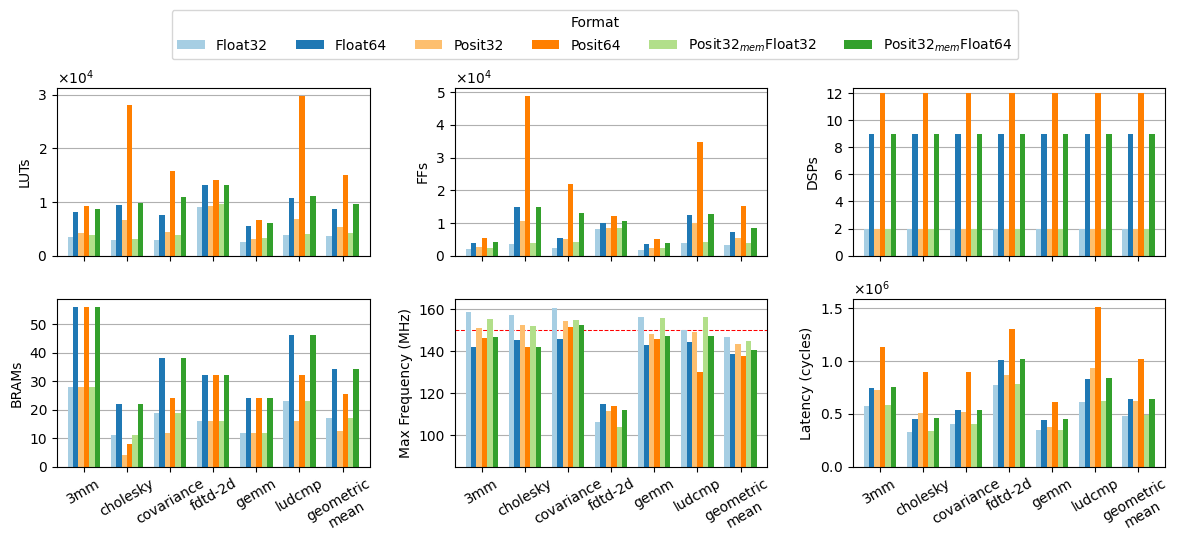

In [72]:
fig, axs = plt.subplots(2, 3, sharex=True,
                        figsize=(12, 5)
                        )
colors = ['#a6cee3', '#1f78b4', '#fdbf6f', '#ff7f00', '#b2df8a', '#33a02c',
          '#a6cee3', '#1f78b4', '#fdbf6f', '#ff7f00', '#b2df8a', '#33a02c']

for i, metric in enumerate(METRICS):
    log_y = metric in ['Cycles'] and False

    # GEOMETRIC MEAN
    # if metric != 'DSPs':
    # g_mean = (df.loc[df['Benchmark'] != 'seidel-2d'])[['Benchmark', 'Format', metric]].groupby('Format').prod().pow(1 / 7)
    g_mean = df[['Benchmark', 'Format', metric]].groupby(
        'Format', sort=False).prod().pow(1 / len(BENCHMARKS))
    # g_mean = g_mean.rename(columns = {'LUTs':'geometric\nmean'})
    # # g_mean.plot(ax=axs[int(i/3),i%3],
    # #             kind='line')
    # for j, v in enumerate(g_mean.values):
    #     axs[int(i/3),i%3].hlines(v, xmin=-1, xmax=8,
    #                             color = colors[j],
    #                             linestyle=(j, (4, 3, 1, 3)),
    #                             # linestyle='-.',
    #                             linewidth=0.75,
    #                             zorder=2)

    # VALUE BAR PLOT
    m_df = df[['Benchmark', 'Format', metric]].pivot(
        index='Benchmark', columns='Format', values=metric)
    m_df = m_df[['Float32', 'Float64', 'Posit32', 'Posit64',
                 'Posit32$_{mem}$Float32', 'Posit32$_{mem}$Float64']]
    m_df.loc['geometric\nmean'] = g_mean.T[['Float32', 'Float64', 'Posit32', 'Posit64',
                                            'Posit32$_{mem}$Float32', 'Posit32$_{mem}$Float64']].values[0]
    ax = m_df.plot(ax=axs[int(i/3), i % 3],
                   # x='Test',
                   kind='bar',
                   stacked=False,
                   logy=log_y,
                   ylabel=metric,
                   color=colors,
                   rot=30,
                   legend=False,
                   zorder=2,
                   width=0.75,
                   # colormap=cmap,
                   # title='Grouped Bar Graph with dataframe'
                   )

    ax.grid(axis='y', zorder=0)
    ax.set_xlabel('')


# Some adjustments
# DSPs plot
axs[0, 2].set_ylim(0, 12.4)
axs[0, 2].set_yticks(range(0, 14, 2))
# Highlight target frequency
axs[1, 1].set_ylim(85, 165)
axs[1, 1].axhline(y=150, color='red', linestyle='--', linewidth=0.75, zorder=1)
# Y Axis format
axs[1, 2].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')
axs[0, 1].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')
axs[0, 0].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')


# Set global legend
axLine, axLabel = axs[1, 1].get_legend_handles_labels()
fig.legend(axLine, axLabel,
           loc='upper center',
           ncol=6,
           title='Format',
           bbox_to_anchor=(0.5, 1.1)
           )


fig.tight_layout()
plt.savefig("bambu_polybench.pdf", bbox_inches="tight")
plt.show()

Another order (32-bit first, then 64)

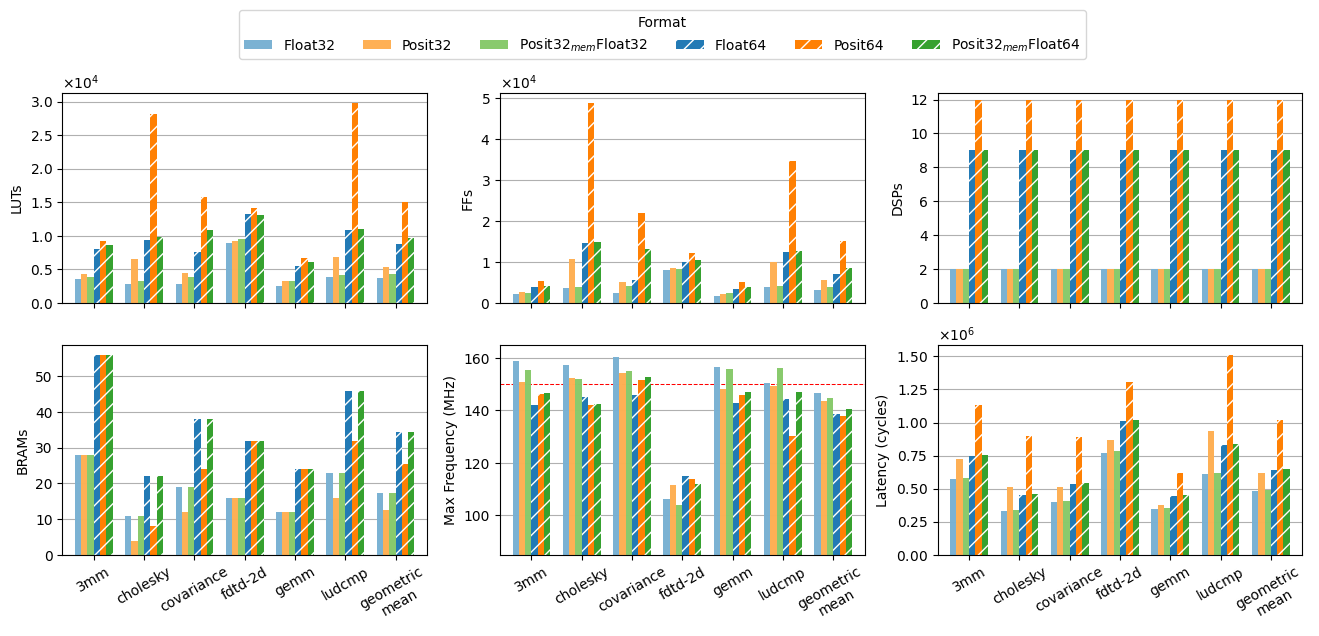

In [73]:
fig, axs = plt.subplots(2, 3, sharex=True,
                        figsize=(12, 5)
                        )
# colors = ['#a6cee3', '#fdbf6f', '#b2df8a', '#1f78b4', '#ff7f00', '#33a02c']
colors = ['#79B1D3', '#FEAF53', '#88CA6B', '#1f78b4', '#ff7f00', '#33a02c']
# colors = ['#0077b1', '#ff7f2b', '#00a037', '#0077b1', '#ff7f2b', '#00a037']
hatches = ([''] * (len(df)//2+3)) + (['//'] * (len(df)//2+3))

plt.rcParams.update({'hatch.color': 'w'})


for i, metric in enumerate(METRICS):
    log_y = metric in ['Cycles'] and False

    # GEOMETRIC MEAN
    # if metric != 'DSPs':
    # g_mean = (df.loc[df['Benchmark'] != 'seidel-2d'])[['Benchmark', 'Format', metric]].groupby('Format').prod().pow(1 / 7)
    g_mean = df[['Benchmark', 'Format', metric]].groupby(
        'Format', sort=False).prod().pow(1 / len(BENCHMARKS)).T[['Float32', 'Posit32', 'Posit32$_{mem}$Float32', 'Float64', 'Posit64', 'Posit32$_{mem}$Float64']]
    # g_mean = g_mean.rename(columns = {'LUTs':'geometric\nmean'})
    # # g_mean.plot(ax=axs[int(i/3),i%3],
    # #             kind='line')
    # for j, v in enumerate(g_mean.values):
    #     axs[int(i/3),i%3].hlines(v, xmin=-1, xmax=8,
    #                             color = colors[j],
    #                             linestyle=(j, (4, 3, 1, 3)),
    #                             # linestyle='-.',
    #                             linewidth=0.75,
    #                             zorder=2)

    # VALUE BAR PLOT
    m_df = df[['Benchmark', 'Format', metric]].pivot(
        index='Benchmark', columns='Format', values=metric)
    m_df = m_df[['Float32', 'Posit32',
                 'Posit32$_{mem}$Float32', 'Float64', 'Posit64', 'Posit32$_{mem}$Float64']]
    m_df.loc['geometric\nmean'] = g_mean.values[0]
    ax = m_df.plot(ax=axs[int(i/3), i % 3],
                   # x='Test',
                   kind='bar',
                   stacked=False,
                   logy=log_y,
                   ylabel=metric,
                   color=colors,
                   rot=30,
                   legend=False,
                   zorder=2,
                   width=0.75,
                   alpha=0.99,  # Bug with hatches: https://stackoverflow.com/questions/5195466/matplotlib-does-not-display-hatching-when-rendering-to-pdf
                   # colormap=cmap,
                   # title='Grouped Bar Graph with dataframe'
                   )
    # Set hatches
    bars = ax.patches
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

    ax.grid(axis='y', zorder=0)
    ax.set_xlabel('')


# Some adjustments
# DSPs plot
axs[0, 2].set_ylim(0, 12.4)
axs[0, 2].set_yticks(range(0, 14, 2))
# Highlight target frequency
axs[1, 1].set_ylim(85, 165)
axs[1, 1].axhline(y=150, color='red', linestyle='--', linewidth=0.75, zorder=1)
# Y Axis format
axs[1, 2].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')
axs[0, 1].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')
axs[0, 0].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')


# Set global legend
axLine, axLabel = axs[1, 1].get_legend_handles_labels()
fig.legend(axLine, axLabel,
           loc='upper center',
           ncol=6,
           title='Format',
           bbox_to_anchor=(0.5, 1.03)
           )


# fig.tight_layout()
figure = plt.gcf()  # get current figure
figure.set_size_inches(16, 6)  # set figure's size manually

plt.savefig("bambu_polybench.pdf", bbox_inches="tight")
plt.show()

In [17]:
df
df[['Benchmark', 'Format', metric]].pivot(
        index='Benchmark', columns='Format', values=metric).reindex(index=['3mm', 'fdtd-2d', 'gemm', 'cholesky', 'covariance', 'ludcmp'])

Format,Float32,Float64,Posit32,Posit32$_{mem}$Float32,Posit32$_{mem}$Float64,Posit64
Benchmark,,,,,,
3mm,573628,746426,724813,582299,753106,1135187
fdtd-2d,771404,1007680,864295,784083,1018539,1303810
gemm,343967,445417,374804,352373,451971,616519
cholesky,327975,454622,510996,337574,462541,897997
covariance,400285,534018,515494,406465,540589,891808
ludcmp,611762,831141,934330,618841,836500,1511692


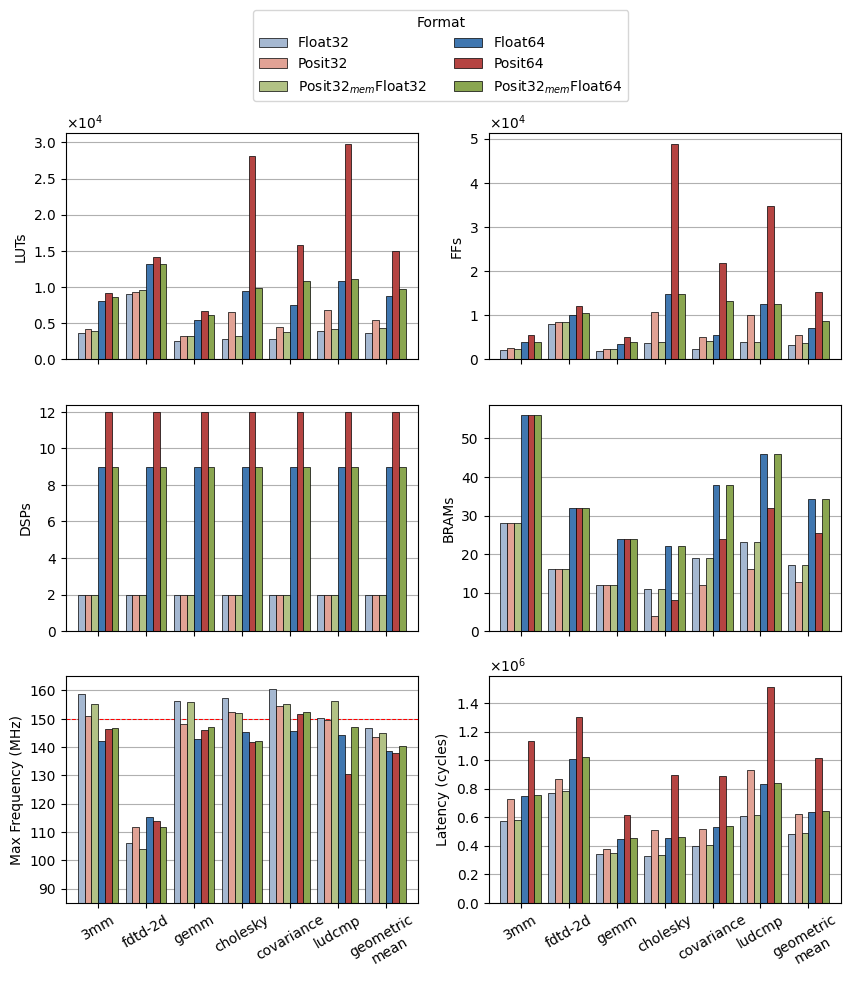

In [19]:
fig, axs = plt.subplots(3, 2, sharex=True,
                        # figsize=(12, 5)
                        )
# colors = ['#a6cee3', '#fdbf6f', '#b2df8a', '#1f78b4', '#ff7f00', '#33a02c']
# colors = ['#79B1D3', '#FEAF53', '#88CA6B', '#1f78b4', '#ff7f00', '#33a02c']
# colors = ['#95a9cd', '#d29291', '#bbcc96', '#4573a7', '#aa4744', '#89a54e']
# colors = ['#a2b7d2', '#e59e91', '#a3cc86', '#3274b2', '#b9383b', '#3c980f']
colors = ['#a5b8d1', '#e1a295', '#b2c285', '#4077b0', '#b54442', '#8aa650']
# colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#1b9e77', '#d95f02', '#7570b3']
# colors = ['#0077b1', '#ff7f2b', '#00a037', '#0077b1', '#ff7f2b', '#00a037']
hatches = ([''] * (len(df)//2+3)*8) + (['//'] * (len(df)//2+3))

plt.rcParams.update({'hatch.color': 'w'})


for i, metric in enumerate(METRICS):
    log_y = metric in ['Cycles'] and False

    # VALUE BAR PLOT
    m_df = df[['Benchmark', 'Format', metric]].pivot(
        index='Benchmark', columns='Format', values=metric)
    # Group benchmarks that use div/sqrt operations
    # m_df = m_df.reindex(index=['3mm', 'fdtd-2d', 'gemm', 'cholesky', 'covariance', 'ludcmp'])
    m_df.loc['geometric\nmean'] = gmean(m_df, axis=0).T
    
    m_df = m_df[['Float32', 'Posit32',
                 'Posit32$_{mem}$Float32', 'Float64', 'Posit64', 'Posit32$_{mem}$Float64']]

    ax = m_df.plot(ax=axs[int(i/2), i % 2],
                   # x='Test',
                   kind='bar',
                   stacked=False,
                   logy=log_y,
                   ylabel=metric,
                   color=colors,
                   rot=30,
                   legend=False,
                   zorder=2,
                   width=0.85,
                   edgecolor='k',
                   linewidth=0.5,
                   alpha=1,  # Bug with hatches: https://stackoverflow.com/questions/5195466/matplotlib-does-not-display-hatching-when-rendering-to-pdf
                   # colormap=cmap,
                   # title='Grouped Bar Graph with dataframe'
                   )
    # Set hatches
    bars = ax.patches
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

    ax.grid(axis='y', zorder=0)
    ax.set_xlabel('')


# Some adjustments
# DSPs plot
axs[1, 0].set_ylim(0, 12.4)
axs[1, 0].set_yticks(range(0, 14, 2))
# Highlight target frequency
axs[2, 0].set_ylim(85, 165)
axs[2, 0].axhline(y=150, color='red', linestyle='--', linewidth=0.75, zorder=1.9)
# Y Axis format
axs[2, 1].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')
axs[0, 1].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')
axs[0, 0].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')


# Set global legend
axLine, axLabel = axs[1, 1].get_legend_handles_labels()
fig.legend(axLine, axLabel,
           loc='upper center',
           ncol=2,
           title='Format',
           bbox_to_anchor=(0.5, 1.01)
           )


figure = plt.gcf()  # get current figure
# figure.tight_layout()
# set figure's size manually
# figure.set_size_inches(16, 6)  
figure.set_size_inches(10, 10)

plt.savefig("bambu_polybench.pdf", bbox_inches="tight")
plt.show()

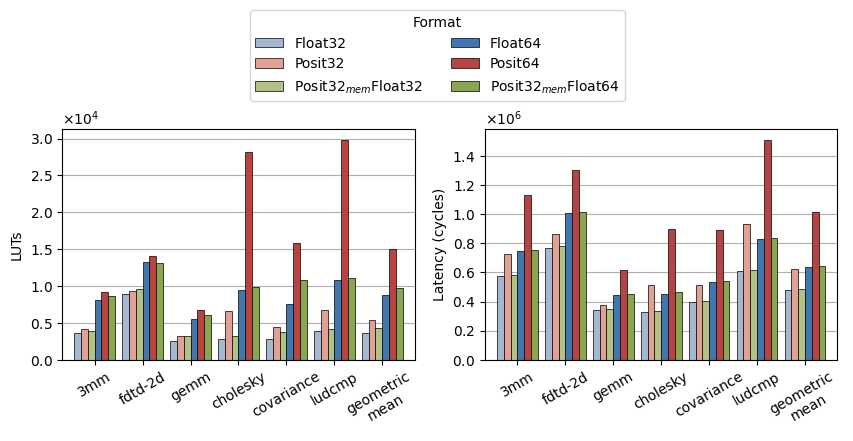

In [27]:
fig, axs = plt.subplots(1, 2, sharex=True,
                        # figsize=(12, 5)
                        )
# colors = ['#a6cee3', '#fdbf6f', '#b2df8a', '#1f78b4', '#ff7f00', '#33a02c']
# colors = ['#79B1D3', '#FEAF53', '#88CA6B', '#1f78b4', '#ff7f00', '#33a02c']
# colors = ['#95a9cd', '#d29291', '#bbcc96', '#4573a7', '#aa4744', '#89a54e']
# colors = ['#a2b7d2', '#e59e91', '#a3cc86', '#3274b2', '#b9383b', '#3c980f']
colors = ['#a5b8d1', '#e1a295', '#b2c285', '#4077b0', '#b54442', '#8aa650']
# colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#1b9e77', '#d95f02', '#7570b3']
# colors = ['#0077b1', '#ff7f2b', '#00a037', '#0077b1', '#ff7f2b', '#00a037']
hatches = ([''] * (len(df)//2+3)*8) + (['//'] * (len(df)//2+3))

plt.rcParams.update({'hatch.color': 'w'})


METRICS = ['LUTs', 'Latency (cycles)']
for i, metric in enumerate(METRICS):
    log_y = metric in ['Cycles'] and False

    # VALUE BAR PLOT
    m_df = df[['Benchmark', 'Format', metric]].pivot(
        index='Benchmark', columns='Format', values=metric)
    # Group benchmarks that use div/sqrt operations
    m_df = m_df.reindex(index=['3mm', 'fdtd-2d', 'gemm', 'cholesky', 'covariance', 'ludcmp'])
    m_df.loc['geometric\nmean'] = gmean(m_df, axis=0).T
    
    m_df = m_df[['Float32', 'Posit32',
                 'Posit32$_{mem}$Float32', 'Float64', 'Posit64', 'Posit32$_{mem}$Float64']]

    ax = m_df.plot(ax=axs[i % 2],
                   # x='Test',
                   kind='bar',
                   stacked=False,
                   logy=log_y,
                   ylabel=metric,
                   color=colors,
                   rot=30,
                   legend=False,
                   zorder=2,
                   width=0.85,
                   edgecolor='k',
                   linewidth=0.5,
                   alpha=1,  # Bug with hatches: https://stackoverflow.com/questions/5195466/matplotlib-does-not-display-hatching-when-rendering-to-pdf
                   # colormap=cmap,
                   # title='Grouped Bar Graph with dataframe'
                   )
    # Set hatches
    bars = ax.patches
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

    ax.grid(axis='y', zorder=0)
    ax.set_xlabel('')


# Some adjustments
# # DSPs plot
# axs[1, 0].set_ylim(0, 12.4)
# axs[1, 0].set_yticks(range(0, 14, 2))
# # Highlight target frequency
# axs[2, 0].set_ylim(85, 165)
# axs[2, 0].axhline(y=150, color='red', linestyle='--', linewidth=0.75, zorder=1.9)
# Y Axis format
# axs[2, 1].ticklabel_format(axis='y', style='sci',
#                            scilimits=(0, 0), useMathText='True')
axs[1].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')
axs[0].ticklabel_format(axis='y', style='sci',
                           scilimits=(0, 0), useMathText='True')


# Set global legend
axLine, axLabel = axs[1].get_legend_handles_labels()
fig.legend(axLine, axLabel,
           loc='upper center',
           ncol=2,
           title='Format',
           bbox_to_anchor=(0.5, 1.3)
           )


figure = plt.gcf()  # get current figure
# figure.tight_layout()
# set figure's size manually
# figure.set_size_inches(16, 6)  
figure.set_size_inches(10, 3)

plt.savefig("bambu_polybench2.pdf", bbox_inches="tight")
plt.show()

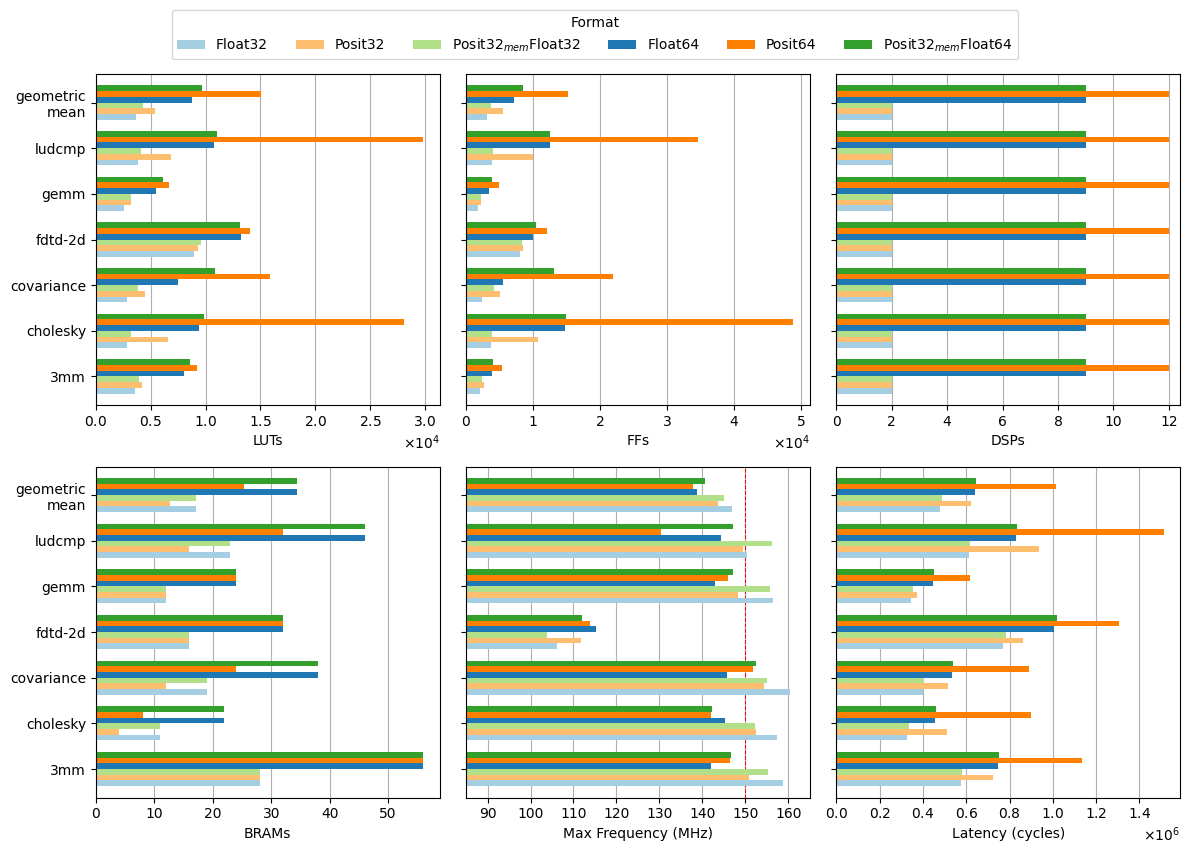

In [74]:
fig, axs = plt.subplots(2, 3, sharey=True,
                        figsize=(12, 8)
                        )
colors = ['#a6cee3', '#fdbf6f', '#b2df8a', '#1f78b4', '#ff7f00', '#33a02c']

for i, metric in enumerate(METRICS):
    log_y = metric in ['Cycles'] and False

    # GEOMETRIC MEAN
    # if metric != 'DSPs':
    # g_mean = (df.loc[df['Benchmark'] != 'seidel-2d'])[['Benchmark', 'Format', metric]].groupby('Format').prod().pow(1 / 7)
    g_mean = df[['Benchmark', 'Format', metric]].groupby(
        'Format', sort=False).prod().pow(1 / len(BENCHMARKS)).T[['Float32', 'Posit32', 'Posit32$_{mem}$Float32', 'Float64', 'Posit64', 'Posit32$_{mem}$Float64']]
    # g_mean = g_mean.rename(columns = {'LUTs':'geometric\nmean'})
    # # g_mean.plot(ax=axs[int(i/3),i%3],
    # #             kind='line')
    # for j, v in enumerate(g_mean.values):
    #     axs[int(i/3),i%3].hlines(v, xmin=-1, xmax=8,
    #                             color = colors[j],
    #                             linestyle=(j, (4, 3, 1, 3)),
    #                             # linestyle='-.',
    #                             linewidth=0.75,
    #                             zorder=2)

    # VALUE BAR PLOT
    m_df = df[['Benchmark', 'Format', metric]].pivot(
        index='Benchmark', columns='Format', values=metric)
    m_df = m_df[['Float32', 'Posit32',
                 'Posit32$_{mem}$Float32', 'Float64', 'Posit64', 'Posit32$_{mem}$Float64']]
    m_df.loc['geometric\nmean'] = g_mean.values[0]
    # m_df = m_df[::-1]
    ax = m_df.plot(ax=axs[int(i/3), i % 3],
                   # x='Test',
                   kind='barh',
                   stacked=False,
                   logx=log_y,
                   #    xlabel=metric,
                   #    title=metric,
                   #    xlabel='X AXIS',
                   color=colors,
                   #    rot=30,
                   legend=False,
                   zorder=2,
                   width=0.75,
                   # colormap=cmap,
                   # title='Grouped Bar Graph with dataframe'
                   )

    ax.grid(axis='x', zorder=0)
    ax.set_xlabel(metric)
    ax.set_ylabel('')


# Some adjustments
# DSPs plot
axs[0, 2].set_xlim(0, 12.4)
axs[0, 2].set_xticks(range(0, 14, 2))
# Highlight target frequency
axs[1, 1].set_xlim(85, 165)
axs[1, 1].axvline(x=150, color='red', linestyle='--',
                  linewidth=0.75, zorder=1.9)
# Y Axis format
axs[1, 2].ticklabel_format(axis='x', style='sci',
                           scilimits=(0, 0), useMathText='True')
axs[0, 1].ticklabel_format(axis='x', style='sci',
                           scilimits=(0, 0), useMathText='True')
axs[0, 0].ticklabel_format(axis='x', style='sci',
                           scilimits=(0, 0), useMathText='True')


# Set global legend
axLine, axLabel = axs[1, 1].get_legend_handles_labels()
fig.legend(axLine, axLabel,
           loc='upper center',
           ncol=6,
           title='Format',
           bbox_to_anchor=(0.5, 1.07)
           )


fig.tight_layout()
# plt.savefig("bambu_polybench.pdf", bbox_inches="tight")
plt.show()